<a href="https://colab.research.google.com/github/jvplopes/DSNP-modulo_1/blob/main/Analisando_os_Dados_do_Airbnb_Rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://t4logistica.com.br/site/wp-content/uploads/2019/04/banner-rio.jpg">

#### **Data Science na Prática 3.0**
---

# Análise dos Dados do Airbnb | *Rio de Janeiro*
*by [João Lopes](https://www.linkedin.com/in/joaovitor-lopes-058a60230/)*

Fundado em 2008, o [Airbnb](https://www.airbnb.com.br/) é uma plataforma de aluguel de hospedagens. O diferencial é permitir que qualquer pessoas oferte acomodações, desde pequenos cômodos em uma residência à castelos medievais.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, atuando em mais de 190 dias, o Airbnb tornou-se a maior plataforma de hospedagem.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos, estudos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="15%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes ao Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos obtivos no _inside Airbnb_.**

## Obtenção dos Dados

Os dados utilizados nesta análise foram obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será utilizado somente o seguinte arquivo:

[listings.csv](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv) - Summary information and metrics for listings in Rio de Janeiro (good for visualisations).

Obs: O Rio de Janeiro é o único município brasileiro com dados disponíveis.

In [ ]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# importar o arquivo listings.csv do site insidearbnb para um DataFrame (df)

df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Não contém nenhum valor válido (NaN)
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto que é oferecido
* `price` - preço do aluguel
* `minimum_nights` - quantidade mínima de noites para alugar
* `number_of_reviews` - quantidade de reviews da propriedade
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm`- Não identificado.
* `license` - Não contém nenhum valor válido (NaN)

Antes de iniciar qualquer análise, é interessante verificar as primeiras linhas do *dataset*.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O _dataset_ possui 24.549 entradas e 18 variáveis.

In [ ]:
# identificar o volume de dados do DataFrame
entradas,variaveis = df.shape

print("Entradas:\t {}".format(entradas))
print("Variáveis:\t {}\n".format(variaveis))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24549
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A coluna `neighbourhood_group` possui 100% dos seus valores ausentes.
* A coluna `license` também possui 100% dos valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 36,5% das entradas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)


license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  36.502505
last_review                        36.502505
name                                0.085543
host_name                           0.061102
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para visualizar a distribuição das variáveis será utilizado um histograma.

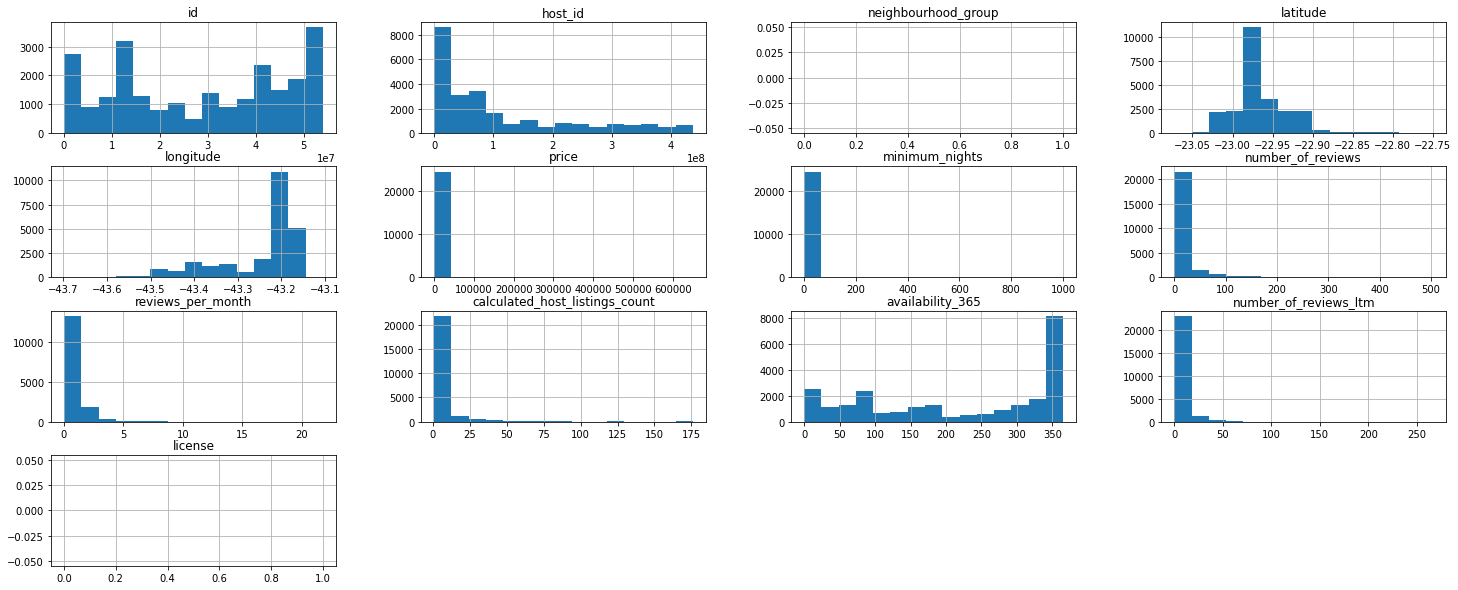

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(25,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de _outliers_ nas variáveis: price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, será feito um resumo estatístico e um _bloxplot_.

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [ ]:
# resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24549.000000,24549.000000,24549.000000,15588.000000,24549.000000,24549.000000
mean,1029.592285,5.092142,14.506416,0.691929,7.066642,218.954907
std,5403.742297,21.211509,34.054009,0.935476,20.046954,133.727245
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,250.000000,2.000000,0.000000,0.090000,1.000000,86.000000
50%,479.000000,3.000000,2.000000,0.310000,1.000000,257.000000
75%,900.000000,4.000000,12.000000,0.962500,4.000000,355.000000
max,650476.000000,1000.000000,504.000000,21.790000,176.000000,365.000000


Analisando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável price possui 75% do valor abaixo de 529, porém seu valor máximo é 623592.
* A o valor máximo daquantidade mínima de noites (minimum_nights) é de 1000, muito maior que 365 dias no ano.

Boxplot para minimum_nights

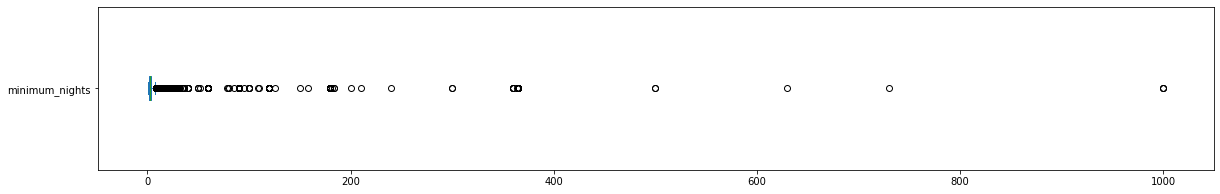

In [ ]:
# minimum_nights - boxplot
df.minimum_nights.plot(kind='box', vert=False, figsize=(20, 3))
plt.show()

In [ ]:
# ver quantidade de entradas acima de 30 dias para minimum_nights
entradas_30 = len(df[df.minimum_nights > 30])

print("minimum_nights - entradas acima de 30:")
print(entradas_30)
print("{:.4f} %".format((entradas_30 / df.shape[0]) * 100))

minimum_nights - entradas acima de 30:
250
1.0184 %


Boxplot para price

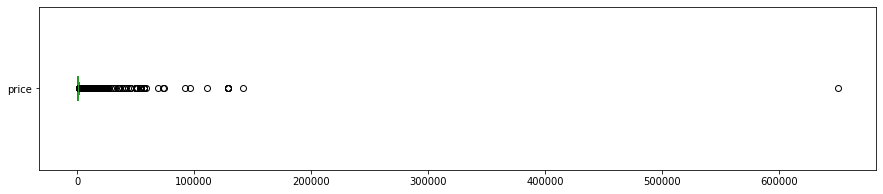


price: Preços acima de 1500
2877 entradas
11.7194%


In [ ]:
# price - boxplot
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de entradas acima de 1500 para price
entradas_15 = len(df[df.price > 1500])
print("\nprice: Preços acima de 1500")
print("{} entradas".format(entradas_15))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0]) * 100))

#### Histogramas sem *outliers*

Foram identificamos _outliers_ nas variáveis `price` e `minimum_nights`, agora vamos removê-los e visualizar os histogramas.

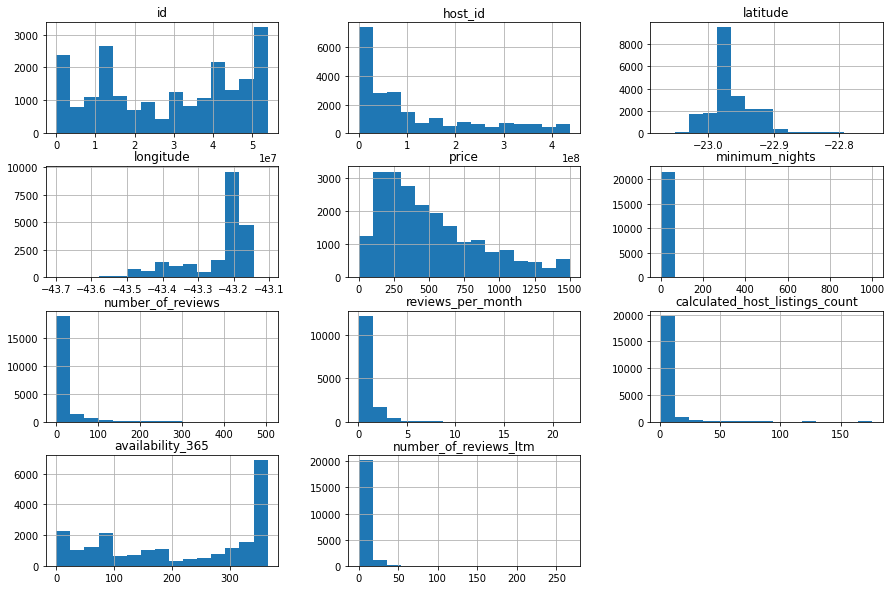

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True) #price
df_clean.drop(df_clean[df_clean.minimum_nights > 1500].index, axis=0, inplace=True) #minimum_nights

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# remover `license`, pois está vazio
df_clean.drop('license', axis=1, inplace=True)

# plotar o histograma limpo
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

print("O valor médio é R$ {:.2f}".format(df_clean.price.mean()))

O valor médio é R$ 503.26


### **Q6. Qual a correlação existente entre as variáveis**

Para aferir a correlação será utilizada um matriz de correlação e para facilitar a visualização será exibido um _heatmap_.

In [ ]:
# criar uma matriz de correlação
correlacao = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
display(correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.012288,-0.032186,0.024926,0.172171,0.040567,-0.013039
minimum_nights,0.012288,1.000000,-0.039194,-0.047171,0.021235,0.030650,-0.052488
number_of_reviews,-0.032186,-0.039194,1.000000,0.566486,-0.035308,-0.139668,0.655670
reviews_per_month,0.024926,-0.047171,0.566486,1.000000,0.022321,-0.139735,0.785756
calculated_host_listings_count,0.172171,0.021235,-0.035308,0.022321,1.000000,0.006998,0.000529
availability_365,0.040567,0.030650,-0.139668,-0.139735,0.006998,1.000000,-0.155161
number_of_reviews_ltm,-0.013039,-0.052488,0.655670,0.785756,0.000529,-0.155161,1.000000


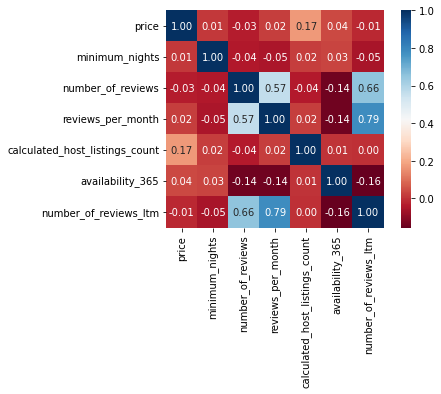

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, square=True, annot=True, fmt='.2f', linecolor='white', cmap='RdBu');



As únicas variáveis que não são nulas, são as relacionadas ao _review_.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

O tipo de imóvel mais alugado é o aluguel de casa ou apartamento inteiro, _Entire home/apt_.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    15892
Private room        5232
Shared room          481
Hotel room            67
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    73.329642
Private room       24.141750
Shared room         2.219454
Hotel room          0.309155
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

O bairro com a média de preço mais alta é o Cajú.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Caju          1284.000000
Grumari       1079.333333
Vaz Lobo       859.500000
Leblon         730.950216
Manguinhos     684.500000
Name: price, dtype: float64

O mairro Cajú não está entre os mais famosos da cidade. É necessário verificar o motivo, para isso será verificada a quantidade de imóveis no bairro.

In [ ]:
# ver quantidade de imóveis no Caju
print(df_clean[df_clean.neighbourhood == "Caju"].shape)

# ver o único imóvel no bairro Caju
df_clean[df_clean.neighbourhood == "Caju"]

(1, 16)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
14483,38109801,You FYI yonder was that good,35690302,JungHo,Caju,-22.89588,-43.21316,Entire home/apt,1284,1,0,NaN,NaN,1,365,0


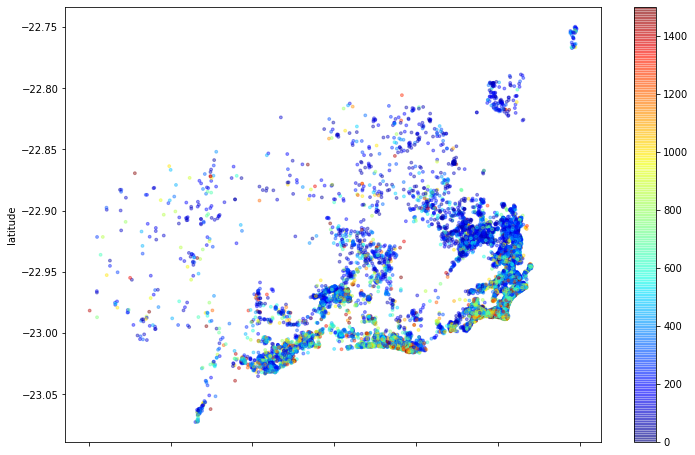

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média de mínimo de noites é de aproximadamente 5 noites (4,93).

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.932262827611665

### **Q10. A distância do local para a praia de copacabana interfere no valor do aluguel?**

Foi calculada a distância do local alugado para a praia de Copacabana e foi verificado que não há correlação entre essa distância e o valor do aluguel (_price_).

In [ ]:
#Importa uma biblioteca nova para calcular a distância
from geopy.distance import geodesic

#Latitude e longitude da praia de copacabana
copacabana = (-22.97331, -43.18519)

#Função que calcula a distência em Km
def distancia(row):
  dist = geodesic((row.latitude,	row.longitude), copacabana).km
  return dist

#Cria a coluna nova (distancia_copacabana) e preenche com a distância
df_clean['distancia_copa'] = df.apply(lambda row: distancia(row), axis=1)


Após visualizar o gráfico _heatmap_ podemos perceber que a distância do local aluga da praia de copacabana não tem correlação com o valor do aluguel.

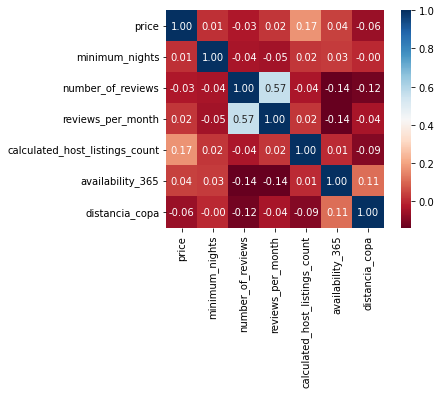

In [ ]:
# plotar um heatmap a partir das correlações
correlacao = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'distancia_copa']].corr()

sns.heatmap(correlacao, square=True, annot=True, fmt='.2f', linecolor='white', cmap='RdBu');

## Conclusões

Nesta análise superficial, foi verificado alguns valores _outliers_ em algumas variáveis, que interferem na análise.
Foi verificado também que alguns bairros possuem poucos imóveis para aluguel, o que interfe nas análises estatísticas de algumas variáveis.

Foi feito um cálculo da distância dos locais alugados para a praia de copacabana e foi verificado que não há correlação (0,06).

O _dataset_ utilisado é muito resumido e não resultou em correlações diferentes de nulo. O arquivo completo `listagens.csv.gz` será estudado no futuro.
